# Load Data

In [ ]:
# MIDI: representing the pitch, timing and volume of the musical notes.

from scipy.fft import fft, ifft, fftshift, fft2, ifft2
from scipy.signal import stft, windows
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import pywt
from scipy.io.wavfile import read as wave_read
import librosa    #pip install librosa

# Happy Birthday Polyphonic.
file_name = 'Happy_Birthday.wav'

rate, audio_data = wave_read(file_name)
duration = librosa.get_duration(path=file_name)

# Fast Fourier Transform

File is sampled at 44100.0 cycles/second


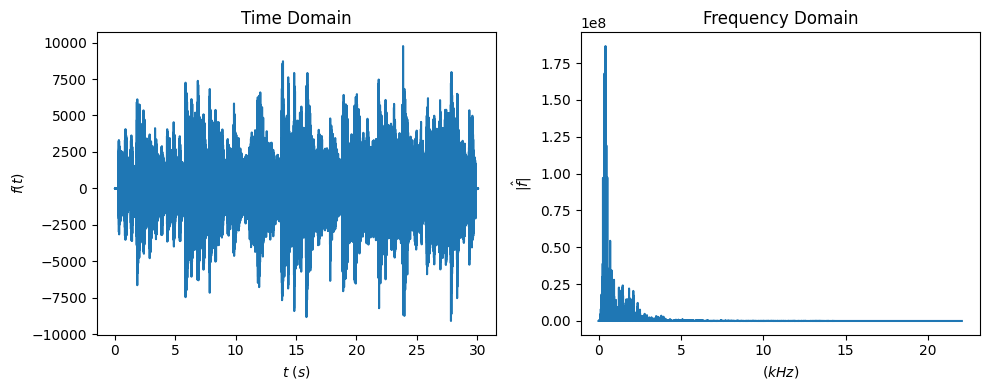

In [ ]:
# Time and Frequency Domain Plots of Audio Clip.
nsamp = audio_data.size
audio_fs = nsamp/duration # number of samples taken over 60s is sampling frequency
tvals = np.linspace(0., duration, nsamp)
freqvals = np.arange(int(nsamp/2))/duration
print(f"File is sampled at {audio_fs} cycles/second")
freq_star = np.abs(fft(audio_data))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].plot(tvals, audio_data)
ax[0].set_xlabel(r"$t ~(s)$")
ax[0].set_ylabel(r"$f(t)$")
ax[0].set_title('Time Domain')
ax[1].plot(freqvals/1000, freq_star[:int(nsamp/2)])
ax[1].set_xlabel(r"$(kHz)$")
ax[1].set_ylabel(r"$|\hat{f}|$")
ax[1].set_title('Frequency Domain')
plt.tight_layout()

# Short Time Fourier Transform

In [ ]:
# Short-time Fourier Transform
def stft_test(bval2, num_segments, w):
    seglength = int(nsamp/num_segments)
    if w == 'gaussian' or w == 'kaiser':
        f2, t2, Zxx2 = stft(audio_data, fs=audio_fs, window = (w, bval2), noverlap=int(seglength/10), nperseg=seglength)
    else:
        f2, t2, Zxx2 = stft(audio_data, fs=audio_fs, window = w, noverlap=int(seglength/10), nperseg=seglength)
    scalefac = np.max(np.abs(Zxx2))

    plt.pcolormesh(t2, f2/1000, np.ma.log10(np.abs(Zxx2)/scalefac), vmin=-2.5, vmax = 0, shading='gouraud')
    plt.colorbar()
    plt.title("Spectrogram")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$\omega ~(kHz)$")
    plt.ylim(0.220, 0.600)
    print(f"b = {bval2}")
    print(f"Number of segments = {num_segments}")
    print("Window = " + w)

## Testing $b$

b = 50
Number of segments = 500
Window = gaussian


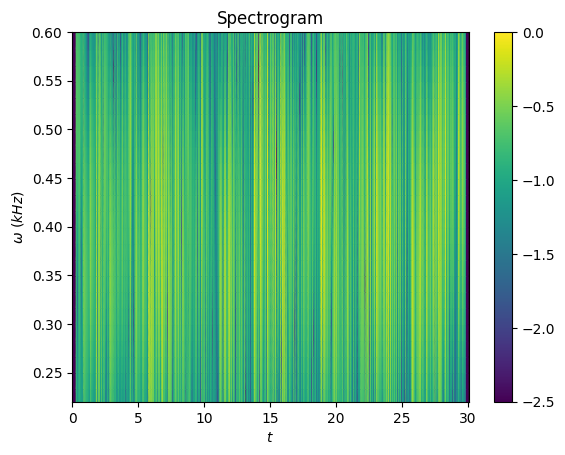

In [ ]:
stft_test(50, 500, 'gaussian')

b = 200
Number of segments = 500
Window = gaussian


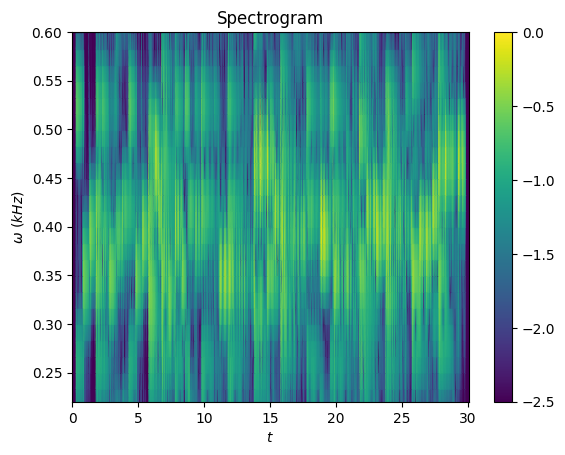

In [ ]:
stft_test(200, 500, 'gaussian')

b = 500
Number of segments = 500
Window = gaussian


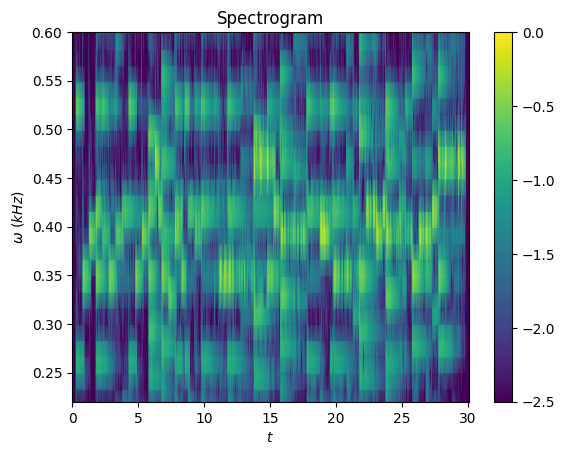

In [ ]:
stft_test(500, 500, 'gaussian')

b = 1000
Number of segments = 500
Window = gaussian


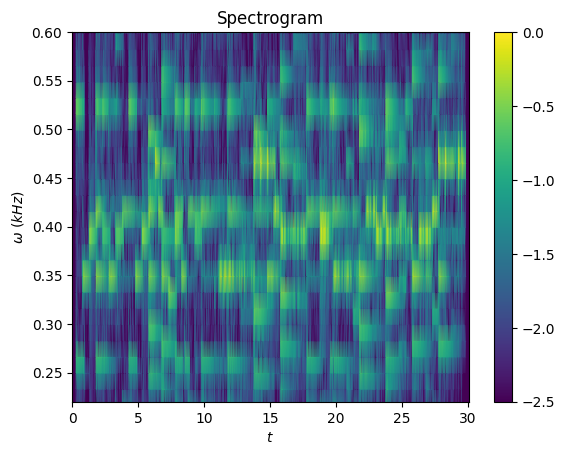

In [ ]:
stft_test(1000, 500, 'gaussian')

From this, we can see that very large values of $b$ are preferrable since the horizontal lines are more concise, which is exactly what we're looking for in midi display. Let's continue using $b = 1000$ and change the other variables.

## Testing Number of Segments

b = 1000
Number of segments = 50
Window = gaussian


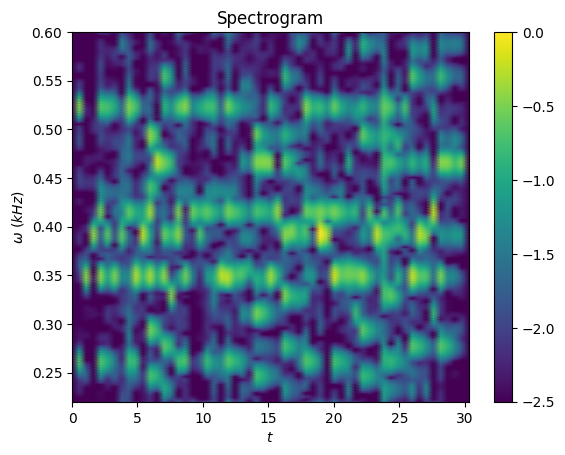

In [ ]:
stft_test(1000, 50, 'gaussian')

b = 1000
Number of segments = 150
Window = gaussian


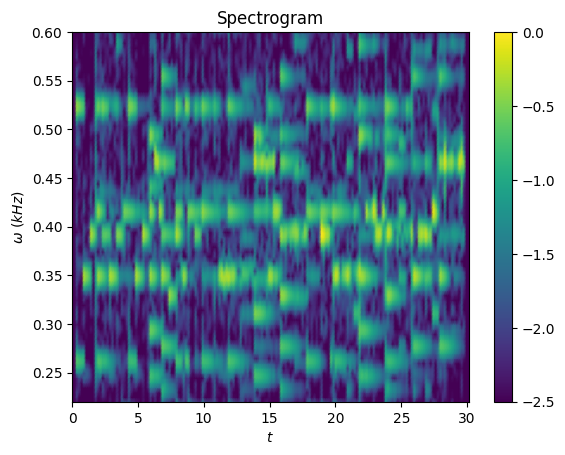

In [ ]:
stft_test(1000, 150, 'gaussian')

b = 1000
Number of segments = 350
Window = gaussian


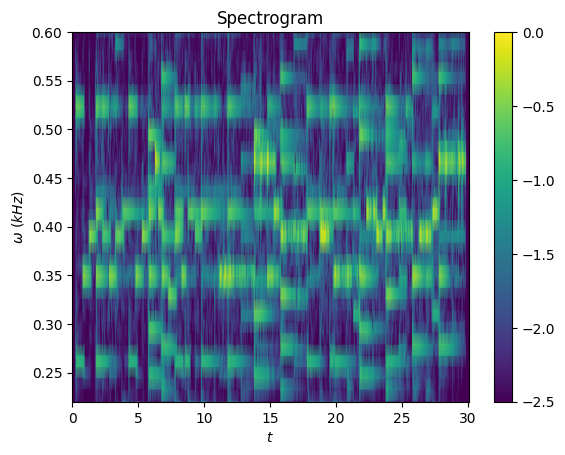

In [ ]:
stft_test(1000, 350, 'gaussian')

b = 1000
Number of segments = 500
Window = gaussian


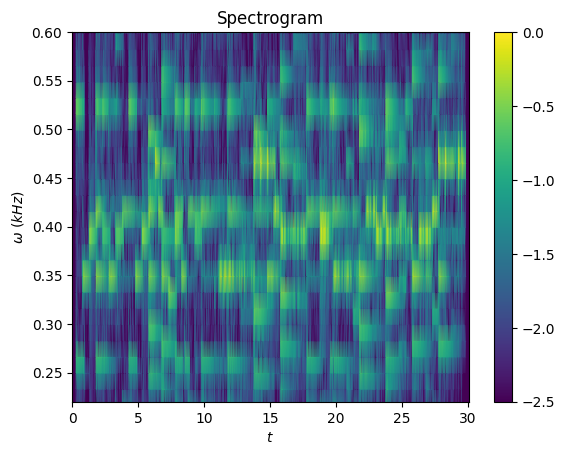

In [ ]:
stft_test(1000, 500, 'gaussian')

b = 1000
Number of segments = 750
Window = gaussian


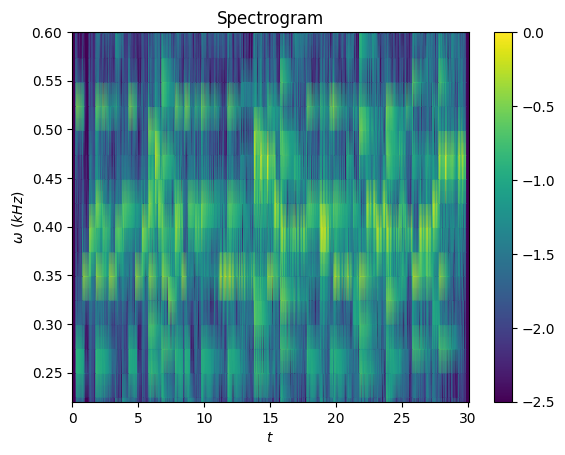

In [ ]:
stft_test(1000, 750, 'gaussian')

From this, we can see that having around $150$ segments yields the clearest spectrogram. Too many or too few segments causes vertical blurriness. Now, using $b = 1000$ and $n = 150$ segments, let's explore the effects of other window shapes on the spectrogram.

## Testing Window Types

b = 1000
Number of segments = 150
Window = gaussian


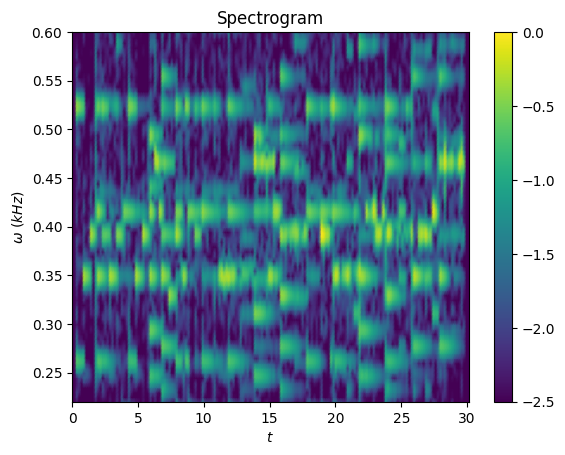

In [ ]:
stft_test(1000, 150, 'gaussian')

b = 1000
Number of segments = 150
Window = boxcar


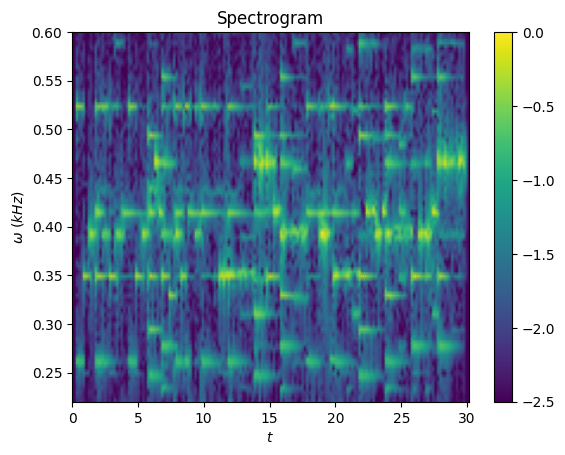

In [ ]:
stft_test(1000, 150, 'boxcar')

b = 1000
Number of segments = 150
Window = triang


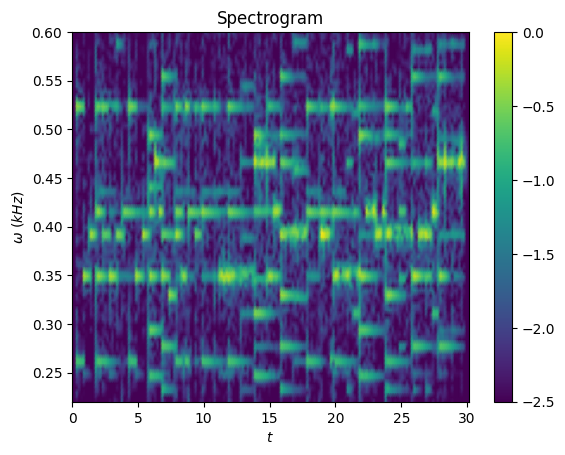

In [ ]:
stft_test(1000, 150, 'triang')

b = 1000
Number of segments = 150
Window = blackman


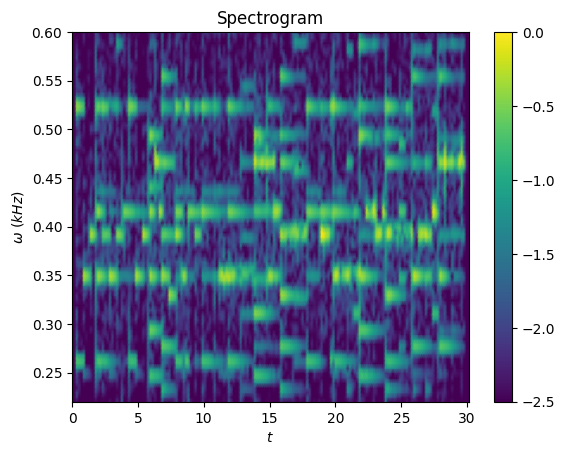

In [ ]:
stft_test(1000, 150, 'blackman')

b = 1000
Number of segments = 150
Window = hamming


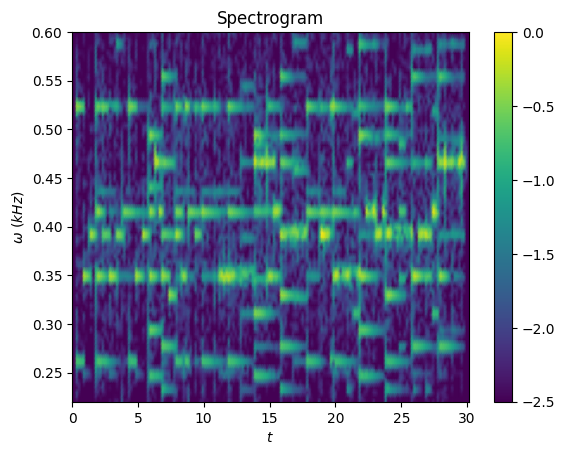

In [ ]:
stft_test(1000, 150, 'hamming')

b = 1000
Number of segments = 150
Window = hann


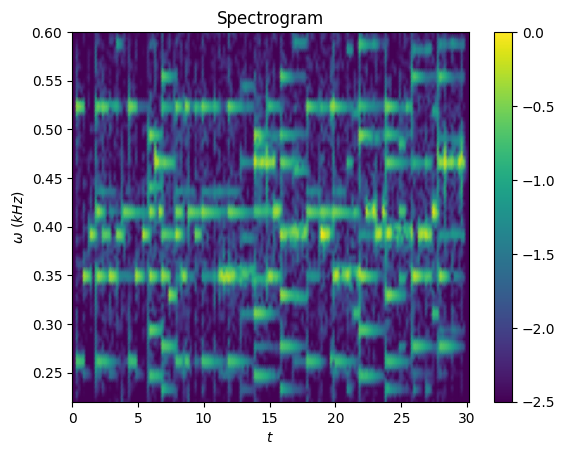

In [ ]:
stft_test(1000, 150, 'hann')

b = 1000
Number of segments = 150
Window = bartlett


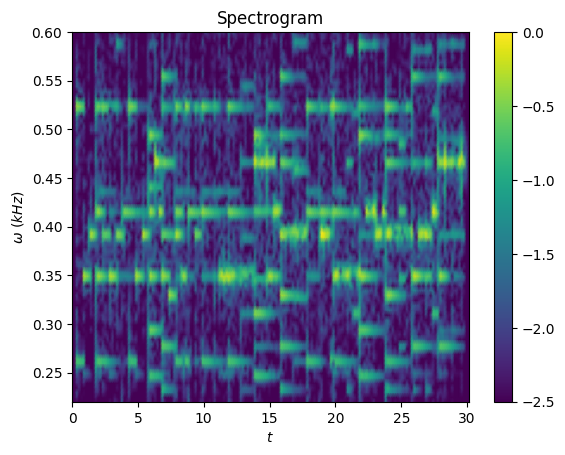

In [ ]:
stft_test(1000, 150, 'bartlett')

b = 1000
Number of segments = 150
Window = flattop


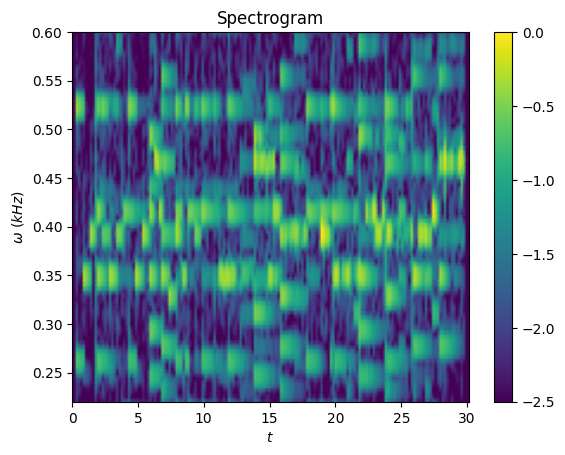

In [ ]:
stft_test(1000, 150, 'flattop')

b = 1000
Number of segments = 150
Window = parzen


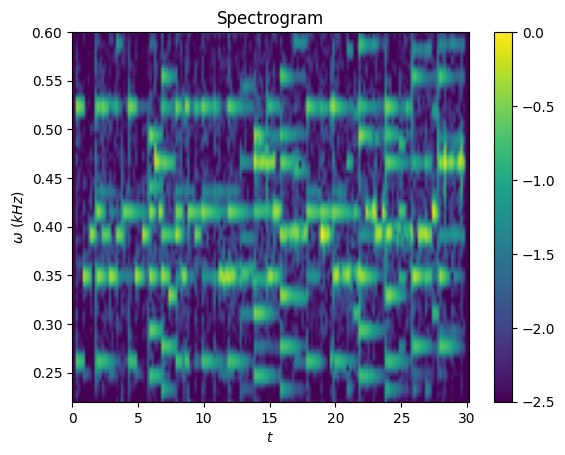

In [ ]:
stft_test(1000, 150, 'parzen')

b = 1000
Number of segments = 150
Window = bohman


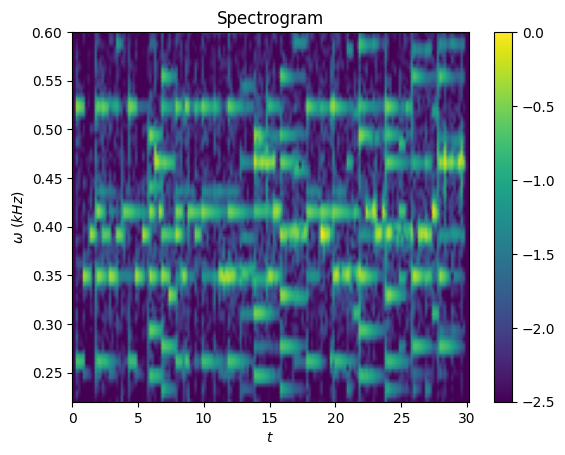

In [ ]:
stft_test(1000, 150, 'bohman')

b = 1000
Number of segments = 150
Window = nuttall


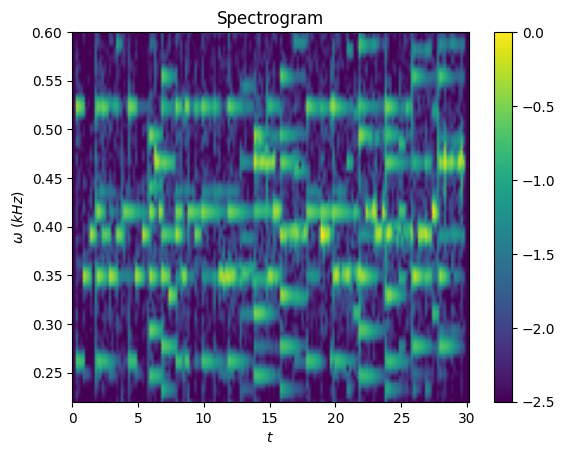

In [ ]:
stft_test(1000, 150, 'nuttall')

b = 1000
Number of segments = 150
Window = cosine


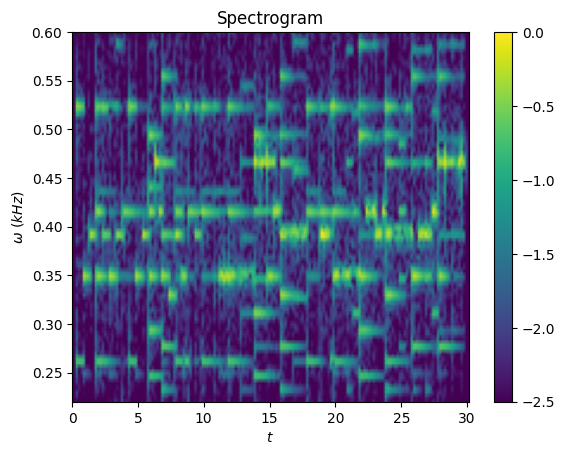

In [ ]:
stft_test(1000, 150, 'cosine')

b = 1000
Number of segments = 150
Window = exponential


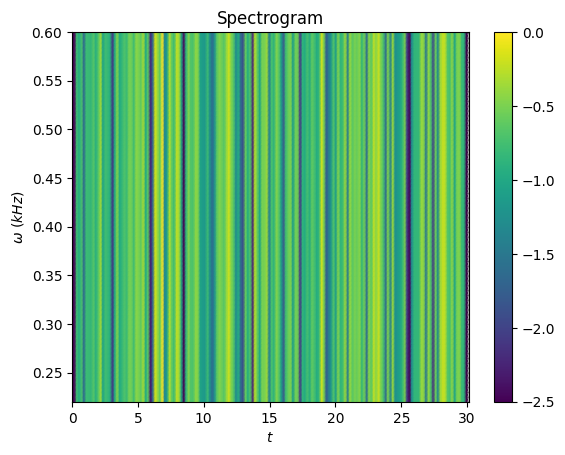

In [ ]:
stft_test(1000, 150, 'exponential')

b = 1000
Number of segments = 150
Window = taylor


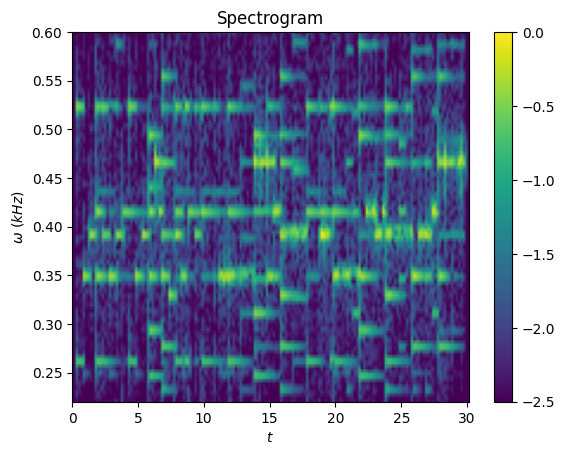

In [ ]:
stft_test(1000, 150, 'taylor')

b = 1000
Number of segments = 150
Window = tukey


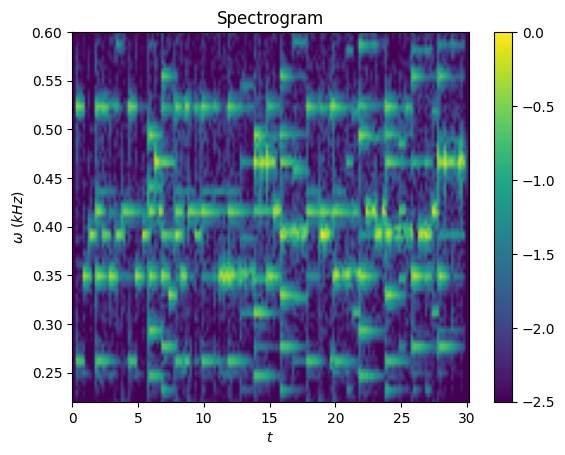

In [ ]:
stft_test(1000, 150, 'tukey')

b = 1000
Number of segments = 150
Window = lanczos


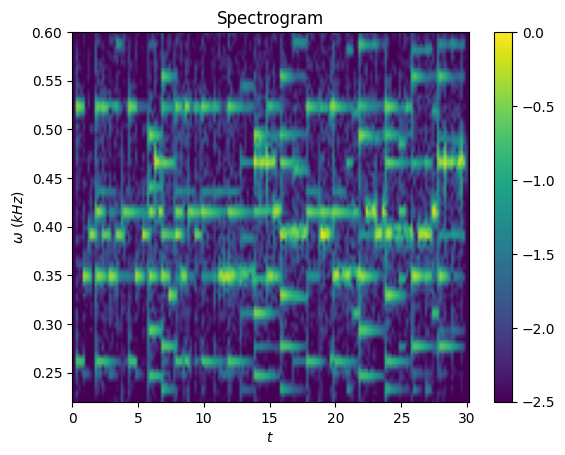

In [ ]:
stft_test(1000, 150, 'lanczos')

b = 7
Number of segments = 150
Window = kaiser


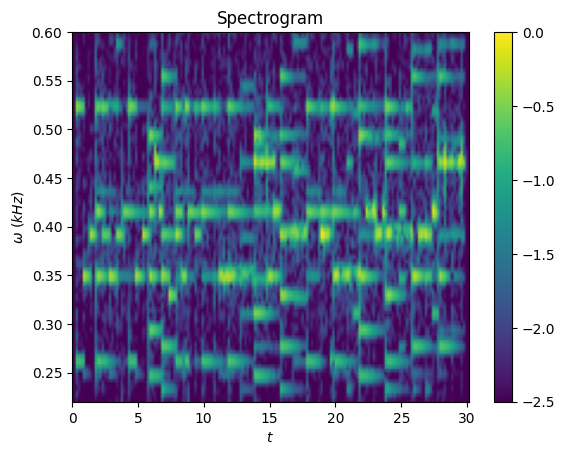

In [ ]:
stft_test(7, 150, 'kaiser')

To be clear, the $b$ value really is only applicable for the Gaussian window because it affects the width of the window. The Kaiser window is unique because it requires a $\beta$ input where the larger it is, the narrower the window is, which is why we use $\beta = 7$. This is because a wider Gaussian window produced better results as opposed to narrower windows, so the same applies to Kaiser windows.

# Chromagram

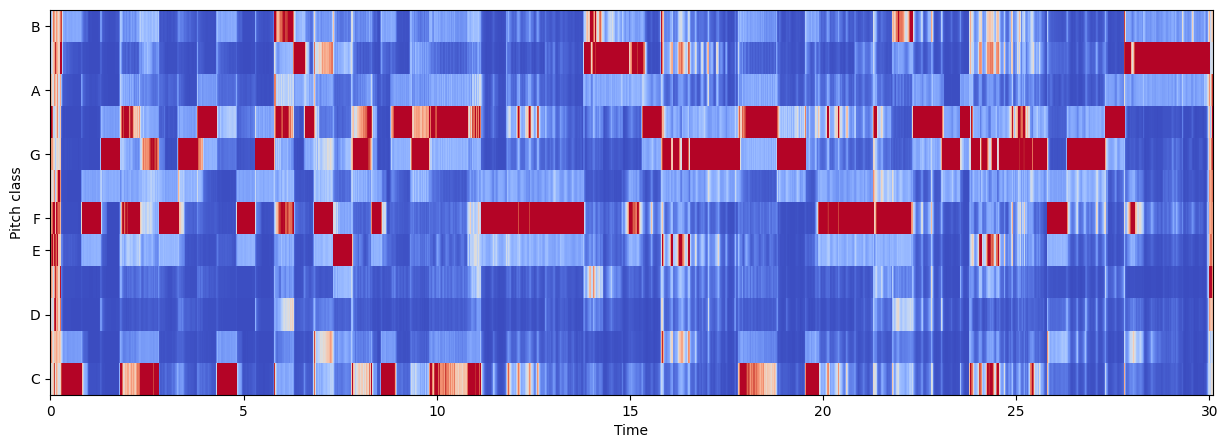

In [ ]:
# Reference to compare our spectrogram with.
# https://librosa.org/doc/latest/auto_examples/plot_chroma.html#sphx-glr-auto-examples-plot-chroma-py

#chroma features
y, sr = librosa.load(file_name)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

# Sound-to-Midi

In [ ]:
# Built-in python function:
# https://pypi.org/project/sound-to-midi/
# https://github.com/tiagoft/audio_to_midi/tree/master
#!pip3 install sound-to-midi #run once
#!pip3 install midiutil # run once

#     sound-to-MIDI depends on window length (t) and beats per minute (b).
#     We can show how windows affect MIDI using this function
from sound_to_midi.monophonic import wave_to_midi
file_name2 = "Happy_Birthday_monophonic.wav"
file_out = 'happy_birthday3.mid'
y, sr = librosa.load(file_name2)  # already loaded from above

midi = wave_to_midi(y)            # NEED to tweak the parameters. horrible output using default parameters.
with open (file_out, 'wb') as f:
    midi.writeFile(f)

print("Done. Exiting!")

/usr/local/lib/python3.10/dist-packages/sound_to_midi/monophonic.py:151: RuntimeWarning: overflow encountered in long_scalars
  elif np.abs(j + midi_min - f0_[n_frame]) == 1:
/usr/local/lib/python3.10/dist-packages/sound_to_midi/monophonic.py:323: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  bpm = librosa.beat.tempo(y=audio_signal)[0]


Done. Exiting!


This version wav to midi conversion only works for monophonic wav files, meaning only one pitch at a time. When trying this method with polyphonic files, it struggles to pick up the melody. The pitch is slightly off from the original, but it is consistent throughout the resulting midi file. The pitch jumps and timing are very strong with this method.



```
# This is formatted as code
```

# Basic_Pitch

In [ ]:
# https://github.com/spotify/basic-pitch
#!pip3 install basic-pitch #run once
#
# Same code is simple and can be run in a web browser:
#     https://basicpitch.spotify.com/

#from basic_pitch.inference import predict_and_save
#predict_and_save (file_name2, 'audio_clip', save_midi=True, sonify_midi=False,save_model_outputs=False,save_notes=False)

import pretty_midi
from basic_pitch.inference import predict

file_out2 = 'happy_birthday2.mid'
model_output, midi_data, note_events = predict(file_name2)
with open (file_out2, 'wb') as f:
    midi_data.write(f)



Predicting MIDI for Happy_Birthday.wav...


This version of midi conversion works pretty well. It excels with extracting pitch even in a polyphonic setting, but it does struggle on deciding a tempo. There is also some amount of noise in the background with random high pitch notes that stick out.